In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##### Overview the Data Set

(64, 64)


(-0.5, 63.5, 63.5, -0.5)

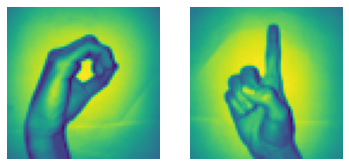

In [142]:
#data load
x_1 = np.load('X.npy')
y_1 = np.load('Y.npy')
img_size = 64
print(x_1[260].shape)
# print(len(x_1[260]))
plt.subplot(1,2,1)
plt.imshow(x_1[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size,img_size))
plt.axis('off')

In [143]:
X = np.concatenate((x_1[204:409] , x_1[822:1027]) , axis=0)
print(X)
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o) , axis=0).reshape(X.shape[0],1)
print("X shape:", X.shape)
print("Y shape:", Y.shape)

[[[0.43529412 0.44705883 0.4509804  ... 0.41568628 0.40392157 0.39215687]
  [0.44705883 0.45882353 0.4627451  ... 0.42745098 0.41960785 0.40392157]
  [0.45490196 0.46666667 0.47843137 ... 0.4392157  0.43529412 0.42352942]
  ...
  [0.58431375 0.6039216  0.62352943 ... 0.5372549  0.52156866 0.5058824 ]
  [0.5411765  0.5568628  0.57254905 ... 0.5254902  0.5137255  0.5019608 ]
  [0.5176471  0.5372549  0.5529412  ... 0.5176471  0.5058824  0.49411765]]

 [[0.5137255  0.5254902  0.53333336 ... 0.46666667 0.45882353 0.4509804 ]
  [0.5254902  0.5372549  0.54509807 ... 0.4745098  0.47058824 0.45882353]
  [0.53333336 0.54509807 0.5529412  ... 0.48235294 0.4745098  0.4627451 ]
  ...
  [0.47843137 0.4862745  0.4862745  ... 0.41568628 0.40784314 0.4       ]
  [0.46666667 0.46666667 0.45882353 ... 0.40392157 0.39607844 0.3882353 ]
  [0.4509804  0.44705883 0.4392157  ... 0.39607844 0.3882353  0.3764706 ]]

 [[0.81960785 0.827451   0.83137256 ... 0.84313726 0.83137256 0.81960785]
  [0.827451   0.827451

In [144]:
# train, test set 만들기
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X ,Y , test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print(number_of_train ,number_of_test)

348 62


In [145]:
# 차원을 변경
X_train_flattern = X_train.reshape(number_of_train, X_train.shape[1]*X_train.shape[2])
X_test_flattern = X_test.reshape(number_of_test, X_test.shape[1]*X_test.shape[2])

print(X_train_flattern.shape ,X_test_flattern.shape)

(348, 4096) (62, 4096)


In [146]:
#행렬을 전치
x_train = X_train_flattern.T
x_test = X_test_flattern.T
y_train = Y_train.T
y_test = Y_test.T

## logistic Regression

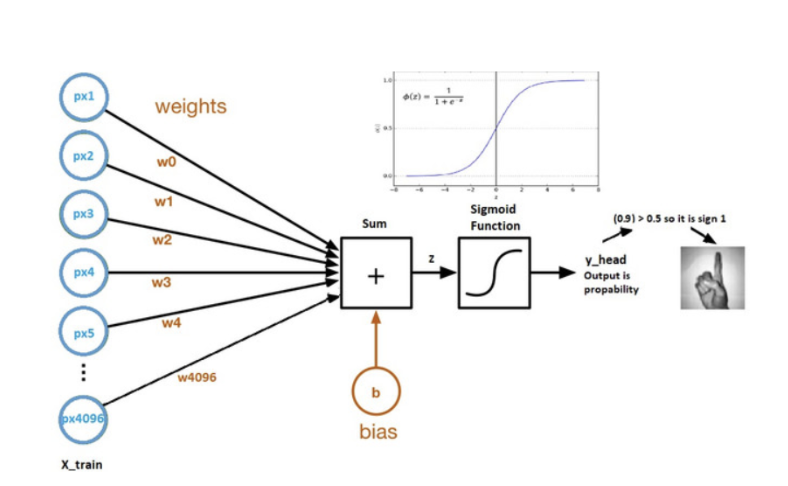

In [147]:
def dummy(parameter):
    dummy_parmeter = parameter+5
    return dummy_parmeter
result = dummy(3)


def initialize_weight_and_bias(dimension):
    w = np.full((dimension , 1), 0.01)
    b = 0.0
    return w, b
w, b = initialize_weight_and_bias(4096)
print(w)
print(np.e**(2))

[[0.01]
 [0.01]
 [0.01]
 ...
 [0.01]
 [0.01]
 [0.01]]
7.3890560989306495


In [148]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [149]:
sigmoid(100)
x_train.shape
loss = forward_progation(w ,b , x_train, y_train)
np.sum(loss)

14.014222401929988

In [150]:
print(x_train.shape[1])

348


In [134]:
def forward_progation(w ,b , x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    return cost

In [135]:
w, b = initialize_weight_and_bias(4096)
cost = forward_progation(w ,b , x_train, y_train)
print(cost)

14.014222401929988


### graient descent

In [155]:
def forward_backward_propagation(w ,b ,x_train, y_train):
    z = np.dot(w.T , x_train)+b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = np.sum(loss)/x_train.shape[1]
    print(cost)
    #backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    print(derivative_weight)
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight":derivative_weight, "derivative_bias":derivative_bias }
    return cost , gradients

In [156]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

14.014222401929988
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 0: 14.014222
9.627488642297356
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135677]
 [0.23780708]
 [0.23305161]]
5.240854119000167
[[0.26380143]
 [0.26917637]
 [0.27407805]
 ...
 [0.24134395]
 [0.23779445]
 [0.23303925]]
1.0168521935097188
[[0.18451127]
 [0.18829561]
 [0.19172661]
 ...
 [0.16973552]
 [0.16732069]
 [0.16401016]]
2.255953010303203
[[-0.26684773]
 [-0.27175916]
 [-0.27636383]
 ...
 [-0.23867753]
 [-0.23466264]
 [-0.22988736]]
2.197458290194129
[[0.25788956]
 [0.26314068]
 [0.2679278 ]
 ...
 [0.23598519]
 [0.23252043]
 [0.22787581]]
2.099012559755202
[[-0.26496186]
 [-0.26983601]
 [-0.27440594]
 ...
 [-0.23698377]
 [-0.23299485]
 [-0.22825349]]
2.271594827182483
[[0.25894257]
 [0.2642152 ]
 [0.26902221]
 ...
 [0.23692682]
 [0.23344743]
 [0.22878386]]
1.9919722248523362
[[-0.26344754]
 [-0.2682923 ]
 [-0.27283478]
 ...
 [-0.23563493]
 [-0

[[-0.20750281]
 [-0.21143881]
 [-0.21508985]
 ...
 [-0.18759604]
 [-0.18433432]
 [-0.18048469]]
1.0236239314826472
[[0.20930127]
 [0.21355657]
 [0.21737937]
 ...
 [0.18831242]
 [0.18570229]
 [0.18214556]]
0.9192850297948977
[[-0.20268257]
 [-0.2065372 ]
 [-0.21010954]
 ...
 [-0.18342128]
 [-0.1802229 ]
 [-0.17645022]]
0.9784252363283364
[[0.20468339]
 [0.20884365]
 [0.21257411]
 ...
 [0.18389142]
 [0.18135938]
 [0.1778969 ]]
0.8815928898998555
[[-0.19750096]
 [-0.20126745]
 [-0.20475487]
 ...
 [-0.17892875]
 [-0.1757988 ]
 [-0.17210924]]
0.9325027385483564
[[0.19970487]
 [0.20376259]
 [0.20739358]
 ...
 [0.1791421 ]
 [0.17669355]
 [0.17333147]]
0.8430995927556606
[[-0.19193463]
 [-0.19560569]
 [-0.19900148]
 ...
 [-0.17409691]
 [-0.17104086]
 [-0.16744107]]
Cost after iteration 90: 0.843100
0.8859074699312965
[[0.19433825]
 [0.19828534]
 [0.20180928]
 ...
 [0.17404134]
 [0.17168195]
 [0.16842679]]
0.8038224084557137
[[-0.18595895]
 [-0.18952668]
 [-0.19282369]
 ...
 [-0.16890285]
 [-0.

[[ 0.00328023]
 [ 0.00336378]
 [ 0.00335622]
 ...
 [-0.00018326]
 [ 0.00012248]
 [ 0.0002511 ]]
0.19613171588137307
[[ 3.12149127e-03]
 [ 3.20228332e-03]
 [ 3.19219330e-03]
 ...
 [-3.18329866e-04]
 [-1.13756368e-05]
 [ 1.19476797e-04]]
0.19570573847982678
[[ 3.22700456e-03]
 [ 3.31034235e-03]
 [ 3.30241939e-03]
 ...
 [-2.14935918e-04]
 [ 8.97154046e-05]
 [ 2.18058574e-04]]
0.1952828031360534
[[ 3.11736503e-03]
 [ 3.19892344e-03]
 [ 3.18933914e-03]
 ...
 [-3.05805333e-04]
 [-5.81430168e-07]
 [ 1.29118425e-04]]
0.1948628741568223
[[ 3.18278417e-03]
 [ 3.26607627e-03]
 [ 3.25794145e-03]
 ...
 [-2.38706656e-04]
 [ 6.47594890e-05]
 [ 1.92678283e-04]]
0.19444591698389077
[[ 3.10640854e-03]
 [ 3.18858335e-03]
 [ 3.17937379e-03]
 ...
 [-2.99663449e-04]
 [ 3.94178238e-06]
 [ 1.32629009e-04]]
Cost after iteration 170: 0.194446
0.19403189812328164
[[ 3.14490612e-03]
 [ 3.22826744e-03]
 [ 3.22002394e-03]
 ...
 [-2.56972090e-04]
 [ 4.52446978e-05]
 [ 1.72642607e-04]]
0.1936207848074463
[[ 3.0908591

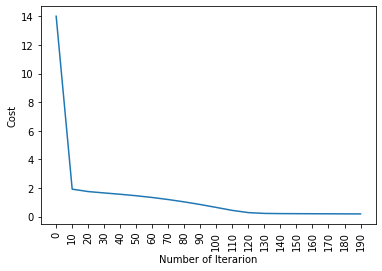

In [157]:
parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [158]:
# prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

In [159]:
predict(parameters["weight"],parameters["bias"],x_test)

array([[0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [162]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weight_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

14.014222401929988
[[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
Cost after iteration 0: 14.014222
9.140081693931261
[[0.26381564]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135677]
 [0.23780707]
 [0.23305161]]
4.266205301126091
[[0.26371705]
 [0.26909016]
 [0.27399014]
 ...
 [0.24126774]
 [0.23771941]
 [0.23296579]]
0.869611162147216
[[-0.15073577]
 [-0.15338523]
 [-0.1558938 ]
 ...
 [-0.13329485]
 [-0.13093328]
 [-0.1282682 ]]
2.1461958243990216
[[0.25714927]
 [0.26238519]
 [0.26715825]
 ...
 [0.235319  ]
 [0.2318647 ]
 [0.22723364]]
2.6310512382435762
[[-0.27016761]
 [-0.27514654]
 [-0.27981398]
 ...
 [-0.24170342]
 [-0.23764123]
 [-0.23280359]]
2.337129506388679
[[0.25951991]
 [0.26480459]
 [0.26962276]
 ...
 [0.2374533 ]
 [0.23396548]
 [0.22929099]]
2.4223533227717557
[[-0.26891865]
 [-0.27387267]
 [-0.27851686]
 ...
 [-0.24058148]
 [-0.23653644]
 [-0.23172139]]
2.463056199812907
[[0.26063618]
 [0.26594398]
 [0.2707835 ]
 ...
 [0.23845803]
 

1.048756475430995
[[-0.2128898 ]
 [-0.21693538]
 [-0.22068512]
 ...
 [-0.19243196]
 [-0.18909303]
 [-0.18514463]]
1.1419012122436498
[[0.21461997]
 [0.21898919]
 [0.22291723]
 ...
 [0.19308874]
 [0.19040345]
 [0.18675744]]
1.0063321356453654
[[-0.2078425 ]
 [-0.21180402]
 [-0.21547176]
 ...
 [-0.1880727 ]
 [-0.18479964]
 [-0.1809309 ]]
1.0875391810383004
[[0.20979416]
 [0.21406418]
 [0.21789498]
 ...
 [0.18844632]
 [0.18584423]
 [0.18229772]]
0.9625644020653619
[[-0.20235283]
 [-0.20622211]
 [-0.20980021]
 ...
 [-0.18332593]
 [-0.18012492]
 [-0.17634328]]
1.0319185565971352
[[0.204527  ]
 [0.20868862]
 [0.21241334]
 ...
 [0.18340022]
 [0.18088812]
 [0.1774487 ]]
Cost after iteration 90: 1.031919
0.917414149232922
[[-0.19638264]
 [-0.20015065]
 [-0.20363079]
 ...
 [-0.17815691]
 [-0.17503475]
 [-0.1713484 ]]
0.9750585066196662
[[0.19877443]
 [0.20281751]
 [0.20642656]
 ...
 [0.17791269]
 [0.17549784]
 [0.17217375]]
0.8708523496097103
[[-0.18989018]
 [-0.19354693]
 [-0.19691998]
 ...
 [-

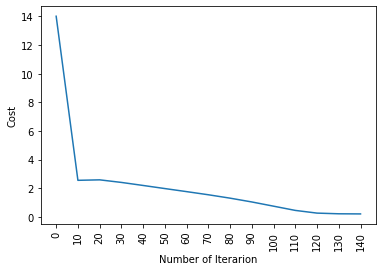

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [163]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

In [168]:
#sklearn 이용
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42 , max_iter=150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


In [169]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [170]:
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [171]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

In [172]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

In [173]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    return parameters

In [174]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction

Cost after iteration 0: 0.341229
Cost after iteration 100: 0.345702
Cost after iteration 200: 0.341976
Cost after iteration 300: 0.336952
Cost after iteration 400: 0.321878
Cost after iteration 500: 0.293899
Cost after iteration 600: 0.257579
Cost after iteration 700: 0.223155
Cost after iteration 800: 0.192069
Cost after iteration 900: 0.165517
Cost after iteration 1000: 0.144729
Cost after iteration 1100: 0.245554
Cost after iteration 1200: 0.115276
Cost after iteration 1300: 0.104312
Cost after iteration 1400: 0.095082
Cost after iteration 1500: 0.087258
Cost after iteration 1600: 0.080512
Cost after iteration 1700: 0.074601
Cost after iteration 1800: 0.069439
Cost after iteration 1900: 0.064947
Cost after iteration 2000: 0.060913
Cost after iteration 2100: 0.057032
Cost after iteration 2200: 0.053049
Cost after iteration 2300: 0.049177
Cost after iteration 2400: 0.046057


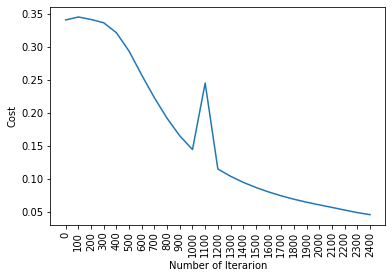

train accuracy: 99.42528735632185 %
test accuracy: 95.16129032258064 %


In [175]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

In [177]:

x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.4748
Epoch 2/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6929 - accuracy: 0.5587
Epoch 3/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5375
Epoch 4/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5747
Epoch 5/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6925 - accuracy: 0.5493
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5641
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6928 - accuracy: 0.5187
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5579
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.5564
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5009
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 855us/step - loss: 0.6905 - accuracy: 0.5367
Epoch 84/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5182
Epoch 85/100
8/8 [==============================] - 0s 855us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 86/100
8/8 [==============================] - 0s 997us/step - loss: 0.6946 - accuracy: 0.5099
Epoch 87/100
8/8 [==============================] - 0s 998us/step - loss: 0.6880 - accuracy: 0.5526
Epoch 88/100
8/8 [==============================] - 0s 855us/step - loss: 0.6904 - accuracy: 0.5371
Epoch 89/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5309
Epoch 90/100
8/8 [==============================] - 0s 712us/step - loss: 0.6884 - accuracy: 0.5497
Epoch 91/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5204
Epoch 92/100
8/8 [==============================] - 0s 998us/step - loss: 0.6898 - accuracy: 0.5406
Epoch 93/100
8/8 [=

8/8 [==============================] - 0s 997us/step - loss: 0.0635 - accuracy: 0.9908
Epoch 65/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9796
Epoch 66/100
8/8 [==============================] - 0s 997us/step - loss: 0.0709 - accuracy: 0.9852
Epoch 67/100
8/8 [==============================] - 0s 997us/step - loss: 0.0583 - accuracy: 0.9863
Epoch 68/100
8/8 [==============================] - 0s 998us/step - loss: 0.0622 - accuracy: 0.9878
Epoch 69/100
8/8 [==============================] - 0s 997us/step - loss: 0.0630 - accuracy: 0.9854
Epoch 70/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0554 - accuracy: 0.9866
Epoch 71/100
8/8 [==============================] - 0s 855us/step - loss: 0.0674 - accuracy: 0.9842
Epoch 72/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0533 - accuracy: 0.9870
Epoch 73/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9925
Epoch 74/100
8/8 [===

8/8 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.9542
Epoch 47/100
8/8 [==============================] - 0s 796us/step - loss: 0.3747 - accuracy: 0.9506
Epoch 48/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.9332
Epoch 49/100
8/8 [==============================] - 0s 997us/step - loss: 0.3352 - accuracy: 0.9600
Epoch 50/100
8/8 [==============================] - 0s 855us/step - loss: 0.3375 - accuracy: 0.9630
Epoch 51/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9502
Epoch 52/100
8/8 [==============================] - 0s 855us/step - loss: 0.3301 - accuracy: 0.9766
Epoch 53/100
8/8 [==============================] - 0s 1ms/step - loss: 0.3093 - accuracy: 0.9727
Epoch 54/100
8/8 [==============================] - 0s 997us/step - loss: 0.3103 - accuracy: 0.9687
Epoch 55/100
8/8 [==============================] - 0s 855us/step - loss: 0.3053 - accuracy: 0.9501
Epoch 56/100
8/8 [===

In [179]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()